#Food Vision Binary Classification

We will start with binary classification and later move to 10 classes then move to 101 classses. This noteboook contains the Model to detect whether the food is a Steak or a Pizza

Step 1. Loading the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip 

zipRef = zipfile.ZipFile("pizza_steak.zip")
zipRef.extractall()
zipRef.close()

--2022-10-05 13:23:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   116MB/s    in 0.9s    

2022-10-05 13:23:06 (116 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def viewRandImg(targetDir, targetClass):
  targetFolder = targetDir + targetClass
  randImg = random.sample(os.listdir(targetFolder), 1)
  img = mpimg.imread(targetFolder + "/" + randImg[0])
  plt.imshow(img)
  plt.title(targetClass)
  plt.axis('off')

  print(f'Image shape: {img.shape}')

  return img



Image shape: (512, 512, 3)


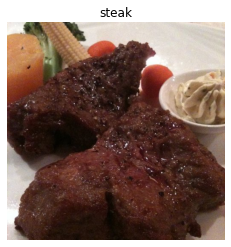

In [ ]:
img = viewRandImg(targetDir = "pizza_steak/train/",
                  targetClass = "steak")

In [ ]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[243, 234, 225],
        [244, 235, 226],
        [245, 236, 229],
        ...,
        [241, 226, 205],
        [240, 225, 204],
        [243, 227, 204]],

       [[243, 234, 225],
        [243, 234, 225],
        [244, 235, 228],
        ...,
        [242, 227, 206],
        [240, 224, 201],
        [238, 222, 199]],

       [[248, 239, 230],
        [244, 235, 226],
        [242, 233, 226],
        ...,
        [243, 227, 204],
        [242, 226, 203],
        [238, 222, 197]],

       ...,

       [[209, 191, 187],
        [213, 195, 191],
        [216, 201, 196],
        ...,
        [182, 156, 133],
        [178, 152, 129],
        [176, 150, 127]],

       [[213, 195, 191],
        [213, 195, 191],
        [216, 201, 196],
        ...,
        [183, 156, 135],
        [182, 155, 134],
        [182, 155, 134]],

       [[221, 203, 199],
        [215, 197, 193],
        [214, 199, 194],
        ...,
        [180, 153, 13

#Let's Build a CNN


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

trainDataGen = ImageDataGenerator(rescale = 1./255)
validDataGen = ImageDataGenerator(rescale = 1./255)

trainDir = "pizza_steak/train"
testDir = "pizza_steak/test"

trainData = trainDataGen.flow_from_directory(directory = trainDir, batch_size = 32, target_size = (224, 224), class_mode = 'binary', seed = 42)
validData = validDataGen.flow_from_directory(directory = testDir, batch_size = 32, target_size = (224, 224), class_mode = 'binary', seed = 42)

#Building CNN

fvModelv1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(50, 3,  activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(50, 3,  activation = 'relu'),
    tf.keras.layers.Conv2D(50, 3,  activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, 'sigmoid')
])

fvModelv1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

history1 = fvModelv1.fit(trainData, epochs = 5, steps_per_epoch=len(trainData), validation_data=validData, validation_steps=len(validData))

Epoch 1/5
47/47 [==============================] - 10s 211ms/step - loss: 0.2182 - accuracy: 0.9093 - val_loss: 0.3247 - val_accuracy: 0.8800
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.1740 - accuracy: 0.9393 - val_loss: 0.3724 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.1132 - accuracy: 0.9627 - val_loss: 0.3767 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.0365 - accuracy: 0.9933 - val_loss: 0.4886 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 10s 212ms/step - loss: 0.0214 - accuracy: 0.9940 - val_loss: 0.6751 - val_accuracy: 0.8460


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

trainDataGen = ImageDataGenerator(rescale = 1./255)
validDataGen = ImageDataGenerator(rescale = 1./255)

trainDir = "pizza_steak/train"
testDir = "pizza_steak/test"

trainData = trainDataGen.flow_from_directory(directory = trainDir, batch_size = 32, target_size = (224, 224), class_mode = 'binary', seed = 42)
validData = validDataGen.flow_from_directory(directory = testDir, batch_size = 32, target_size = (224, 224), class_mode = 'binary', seed = 42)

#Building CNN

fvModelv1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(50, 3,  activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(50, 3,  activation = 'relu'),
    tf.keras.layers.Conv2D(50, 3,  activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, 'sigmoid')
])

fvModelv1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

history1 = fvModelv1.fit(trainData, epochs = 5, steps_per_epoch=len(trainData), validation_data=validData, validation_steps=len(validData))

Epoch 1/5
47/47 [==============================] - 10s 211ms/step - loss: 0.2182 - accuracy: 0.9093 - val_loss: 0.3247 - val_accuracy: 0.8800
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.1740 - accuracy: 0.9393 - val_loss: 0.3724 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.1132 - accuracy: 0.9627 - val_loss: 0.3767 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.0365 - accuracy: 0.9933 - val_loss: 0.4886 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 10s 212ms/step - loss: 0.0214 - accuracy: 0.9940 - val_loss: 0.6751 - val_accuracy: 0.8460


In [ ]:
history1 = fvModelv1.fit(trainData, epochs = 5, steps_per_epoch=len(trainData), validation_data=validData, validation_steps=len(validData))

Epoch 1/5
47/47 [==============================] - 10s 213ms/step - loss: 0.0610 - accuracy: 0.9820 - val_loss: 0.6174 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 10s 211ms/step - loss: 0.0267 - accuracy: 0.9900 - val_loss: 0.6841 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 11s 225ms/step - loss: 0.0057 - accuracy: 0.9993 - val_loss: 0.6485 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 10s 209ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.7041 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 10s 211ms/step - loss: 6.7085e-04 - accuracy: 1.0000 - val_loss: 0.7655 - val_accuracy: 0.8500


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
fvModelv1.save("fvModelv1")